# Decision Trees

1. How might one use a classification tree to return class probabilities?

A leaf doesn't represent only the argmax of the probabilities, but the probabilities themselves by relative frequency.

2. What are the three measures used for building classification trees? What are their relative merits? What's used
for regression trees? What's used for regression trees?

Misclassification error: the sum of the probabilities of not argmax classes. Simple but not differentiable.

Gini Index: the sum of the multiplications of all probabilities.
Information Gain.
For example, the last two learn pure nodes better.

For regression trees we use least squares.

3. How can Gini Index be interpreted?

If we do "soft" classify with probabilities as in 1, then the Misclassification is exactly the Gini Index.
In addition, if we classify with 1 for the argmax and 0 to the rest, the sum over the variance is the Gini Index.

4. What are the disadvantages of decision trees?

Often a small change in the data can result in a very different series of splits.
Another limitation of trees is the lack of smoothness of the prediction surface.
Another problem with trees is their difficulty in modeling additive structure.

5. What does pruning aim to solve? How is it done?
Solves overfitting and helps to generalize.

Cutting branches and reducing the number of the leaves, while optimizing a cost function.
Actually, there is a hyper parameter that governs this tradeoff.

6. What might be a problem with classification trees when categorical feature with many possible values? Suggest a
solution to the problem.

No class gets significant probability.
The solution is deeper tree (with more data).

## Exercise
- How well do you expect a decision tree classifier to learn the parity problem?
Try so solve the parity problem using decision tree and see what results you get.


In [47]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [48]:
arr_size = 100
size_X = 2000

X_train = [np.random.choice(a=[0, 1], size=(arr_size,)) for _ in range(size_X)]
Y_train = [sum(x) % 2 for x in X_train]

X_test = [np.random.choice(a=[0, 1], size=(arr_size,)) for _ in range(int(size_X/4))]
Y_test = [sum(x) % 2 for x in X_test]

In [49]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [50]:
# tree.plot_tree(clf)

In [51]:
preds = clf.predict(X_test)

print(f'acc: {accuracy_score(preds,Y_test)}')

acc: 0.536


- Load the Carseats dataset, and try to predict the sales using the other variables.
Use validation set to tune your hyper-parameters. What was the chosen tree depth? Why did this happen?

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [79]:
carseats = pd.read_csv('Carseats.csv')

X = carseats[['US','Urban','Education','Age','ShelveLoc','Price','Population','Advertising','Income','CompPrice']]
y = carseats[['Sales']]

X = X.replace(['Yes','No','Bad','Medium','Good'],[1,0,0,1,2])

In [80]:
X.head()

,US,Urban,Education,Age,ShelveLoc,Price,Population,Advertising,Income,CompPrice
0,1,1,17,42,0,120,276,11,73,138
1,1,1,10,65,2,83,260,16,48,111
2,1,1,12,59,1,80,269,10,35,113
3,1,1,14,55,1,97,466,4,100,117
4,0,1,13,38,0,128,340,3,64,141


In [81]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=0)

In [103]:
depths = [2*i for i in range(2,15)]


In [104]:
errs = []
for d in depths:
    reg = DecisionTreeRegressor(max_depth=d)
    reg.fit(X_train, y_train)
    preds = reg.predict(X_val)
    err = mean_squared_error(np.array(y_val),preds)
    errs.append(err)

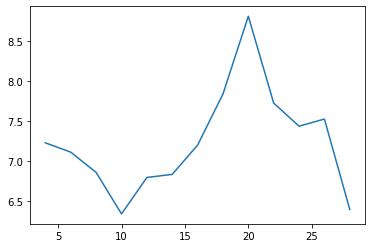

In [105]:
plt.plot(depths,errs)
plt.show()

In [107]:
depth = 10

reg = DecisionTreeRegressor(max_depth=depth)
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

err = mean_squared_error(np.array(y_test),preds)

err

5.761779198513187

The error reduced as the depth was increased to 10, but after that it climbed back because overfit on the train set.
